In [19]:
# Step 1: Load Data
import pandas as pd
url = "https://raw.githubusercontent.com/AyushNagalkar/Trial/main/Admission_Predict.csv"

df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
# Step 2: Data Preprocessing
df.rename(columns={'Chance of Admit ': 'Admit'}, inplace=True)

In [21]:
df['Admit'] = (df['Admit'] >= 0.5).astype(int)  # Convert to binary classification

In [22]:
df = df[['GRE Score', 'CGPA', 'Admit']]  # Counselor focuses on GRE and Academic Score (CGPA)

In [23]:
df.isnull().sum()  # Check for nulls

GRE Score    0
CGPA         0
Admit        0
dtype: int64

In [24]:
# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split

X = df[['GRE Score', 'CGPA']]
y = df['Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [25]:
# Step 4: Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
# Step 5: Evaluate Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9125

Confusion Matrix:
 [[ 5  5]
 [ 2 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.93      0.97      0.95        70

    accuracy                           0.91        80
   macro avg       0.82      0.74      0.77        80
weighted avg       0.90      0.91      0.91        80



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

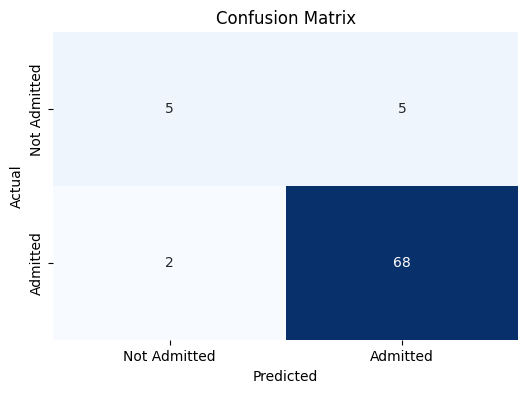

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Admitted', 'Admitted'],
            yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()